# Recession Probability - Dynamic Factor Markov Switching Model - FRED

In [290]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [291]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

#### Smoothed recession probabilities for the United States are obtained from a dynamic-factor markov-switching model applied to four monthly coincident variables: non-farm payroll employment, the index of industrial production, real personal income excluding transfer payments, and real manufacturing and trade sales.

#### The forecast has a delay of approx. 3 months due to delay between collecting data and computation of the forecast.

##### Source: [FRED](https://fred.stlouisfed.org/series/RECPROUSM156N), [The FRED Blog](https://fredblog.stlouisfed.org/2015/05/how-likely-is-a-recession-and-how-fast-is-a-forecast/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

In [292]:
# Pull recession probabilities
recession_prob = fred.get_series('RECPROUSM156N', observation_start='1990-01-01')
recession_prob = recession_prob.dropna()
recession_prob.tail()

2022-11-01    1.28
2022-12-01    1.26
2023-01-01    0.14
2023-02-01    0.46
2023-03-01    0.66
dtype: float64

In [293]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2023-03-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-25,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3.877700e+09
2023-02-26,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3.877700e+09
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3.836950e+09
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5.043400e+09
2023-03-01,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4.249480e+09


In [294]:
# Pull VIX historical data
ticker = "^VIX"
start= "1990-01-01" 
end= "2022-04-02"

vix_history = yf.download(ticker, start=start,end=end, progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,22.139999,23.330000,19.540001,19.629999,19.629999,0.0
2022-03-29,19.700001,19.730000,18.670000,18.900000,18.900000,0.0
2022-03-30,19.379999,20.510000,18.719999,19.330000,19.330000,0.0
2022-03-31,19.680000,21.480000,19.540001,20.559999,20.559999,0.0
2022-04-01,20.620001,20.860001,19.410000,19.629999,19.629999,0.0


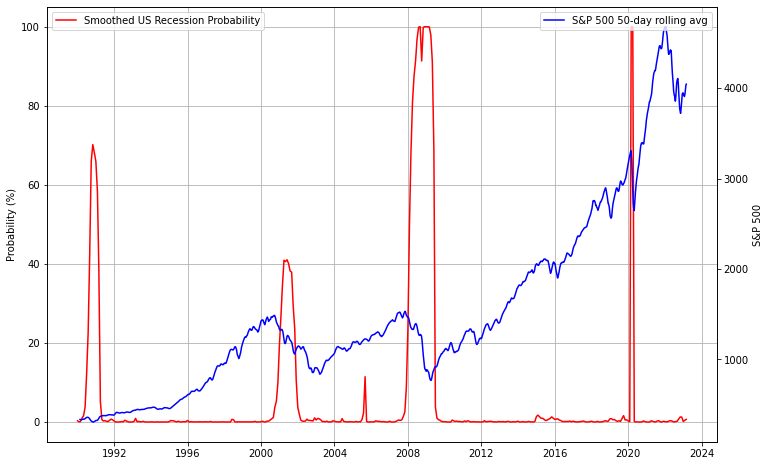

In [295]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

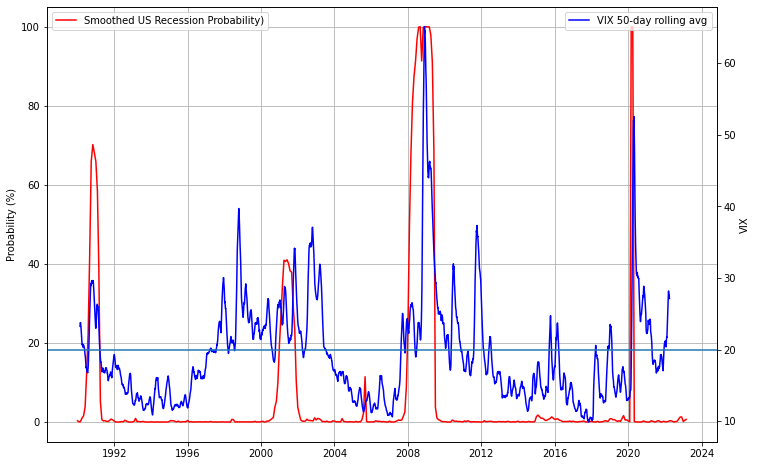

In [296]:
# Plot Recession Probability vs VIX - value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label ='VIX 50-day rolling avg', color='b')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)

# Recession Probability - 10 Year-3 Month Treasury Spread

#### The 10 Year-3 Month Treasury Yield Spread is the difference between the 10 year treasury rate and the 3 month treasury rate. This spread is widely used as a gauge to study the yield curve. A 10 year-3 month treasury spread that approaches 0 signifies a "flattening" yield curve. Furthermore, a negative 10 year-3 month spread has historically been viewed as a precursor or predictor of a recessionary period. The New York Fed uses the rate in a model to predict recessions 2 to 6 quarters ahead.

##### Source: [YCharts](https://ycharts.com/indicators/10_year_3_month_treasury_spread), [Federal Reserve Bank of New York, The Yield Curve as a Leading Indicator](https://www.newyorkfed.org/research/capital_markets/ycfaq.html)


In [297]:
# Pull 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
ten_three_treasury_spread = fred.get_series('T10Y3M', observation_start='1990-01-01')
ten_three_treasury_spread = ten_three_treasury_spread.dropna()
ten_three_treasury_spread.tail()

2023-05-03   -1.88
2023-05-04   -1.89
2023-05-05   -1.82
2023-05-08   -1.79
2023-05-09   -1.76
dtype: float64

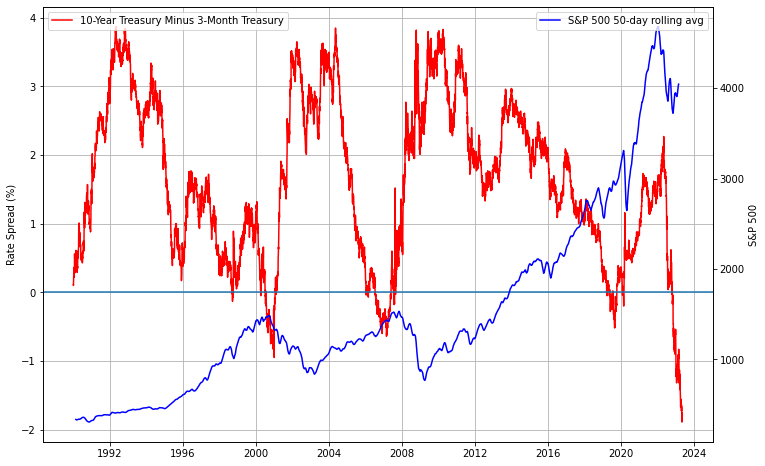

In [298]:
# Plot Ten Year-3 Month Treasury spread vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

#### You may download calculated [recession probabilities](https://www.newyorkfed.org/research/capital_markets/ycfaq#/) in excel format from the Federal Reserve Bank of New York 

In [299]:
treasury_spread_recession_prob = pd.read_excel('/Users/draganbogatic/Documents/Fin_Tech/economic-indicators/resources/allmonth.xls', usecols=['Rec_prob','Date'])
treasury_spread_recession_prob =  treasury_spread_recession_prob.set_index('Date')
treasury_spread_recession_prob.tail().dropna()

,Rec_prob
Date,
2023-12-31,0.473082
2024-01-31,0.571334
2024-02-28,0.544896
2024-03-31,0.577709
2024-04-30,0.682214


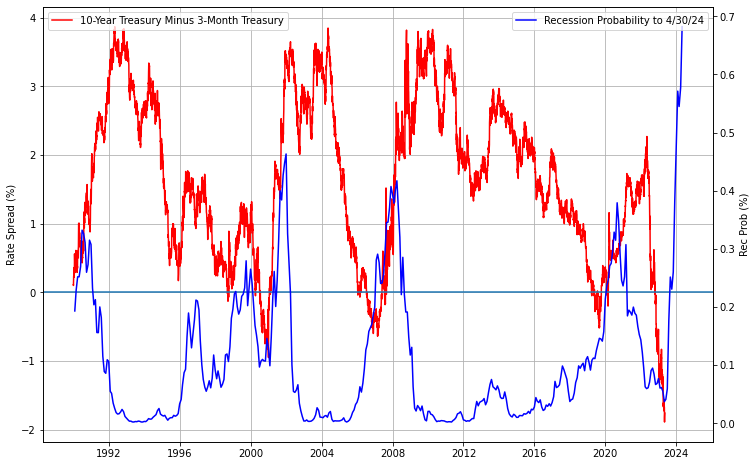

In [300]:
# Plot Ten Year-3 Month Treasury spread vs Recession Probability till 03/31/23
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 4/30/24', color='b')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')

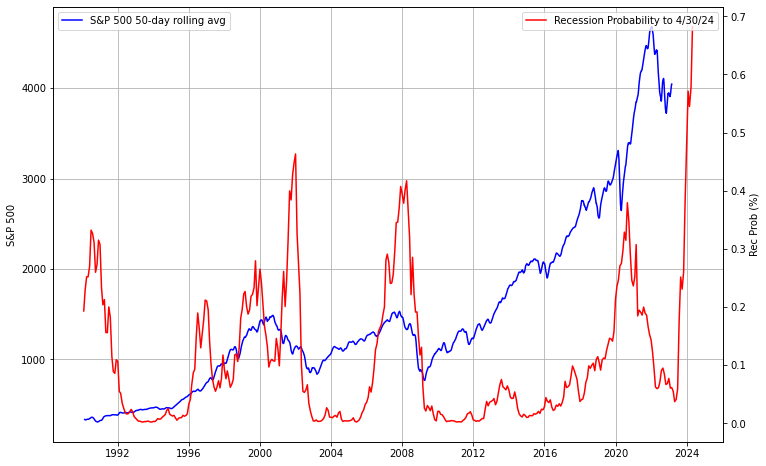

In [301]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 4/30/24', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')

# NBER Recessions 
#### NBER based Recession Indicators for the United States from the Period following the Peak through the Trough

In [302]:
# NBER based Recession Indicators for the United States from the Period following the Peak through the Trough
nber_monthly = fred.get_series('USREC', observation_start='1854-12-01')
nber_monthly = pd.DataFrame(nber_monthly,columns={'USREC'})
nber_monthly

,USREC
1854-12-01,1.0
1855-01-01,0.0
1855-02-01,0.0
1855-03-01,0.0
1855-04-01,0.0
...,...
2022-12-01,0.0
2023-01-01,0.0
2023-02-01,0.0
2023-03-01,0.0


<AxesSubplot:title={'center':'US Recessions 1945-2023 (value 1 represents recession)'}>

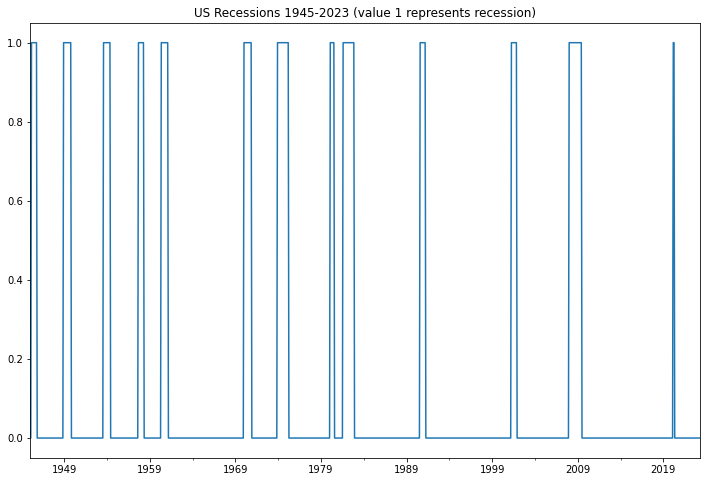

In [303]:
# Plot US recessions from 1945 onwards
nber_monthly = nber_monthly['USREC']['1945':]
nber_monthly.plot(figsize=(12,8), title='US Recessions 1945-2023 (value 1 represents recession)')

In [304]:
# Number of recessions from 1945 onwards
count_recession = nber_monthly.diff().eq(1).sum()
count_recession

13

In [306]:
# Number of recession months
recession_months = recession_months = nber_monthly.shift().eq(1).sum()
recession_months

132

In [307]:
# Number of expansion months
expansion_months = nber_monthly.shift().ne(1).sum()
expansion_months

808

In [308]:
# Average recession length
average_recession = recession_months / count_recession
average_recession

10.153846153846153

In [309]:
# Calculate total number of groups - recessions and expansions
nber_monthly = pd.DataFrame(nber_monthly)
nber_monthly['USREC_x'] = nber_monthly.shift()
nber_monthly['cumsum'] = (nber_monthly['USREC'] != nber_monthly['USREC_x']).cumsum()
nber_monthly

,USREC,USREC_x,cumsum
1945-01-01,0.0,NaN,1
1945-02-01,0.0,0.0,1
1945-03-01,1.0,0.0,2
1945-04-01,1.0,1.0,2
1945-05-01,1.0,1.0,2
...,...,...,...
2022-12-01,0.0,0.0,27
2023-01-01,0.0,0.0,27
2023-02-01,0.0,0.0,27
2023-03-01,0.0,0.0,27


In [310]:
# Average expansion length
average_expansion = expansion_months / (nber_monthly['cumsum'][-1] - count_recession)
average_expansion

57.714285714285715